I have received a dataset made of customer information (age, gender, incomes...) with the aim to create a customer segmentation. The company wants to create group of customer in order to develop different strategies to maximize their spending in our shops.

## 1. Importing libraries

In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

## 2. Data loading

In [2]:
df = pd.read_csv('Mall_Customers.csv')
print(f'Shape of the data: {df.shape}')
df.head()

Shape of the data: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Check for duplicated values
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data types seem appropiate

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

There are more women than men. Dataset is imbalanced

C:\Users\cim_3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cim_3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cim_3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


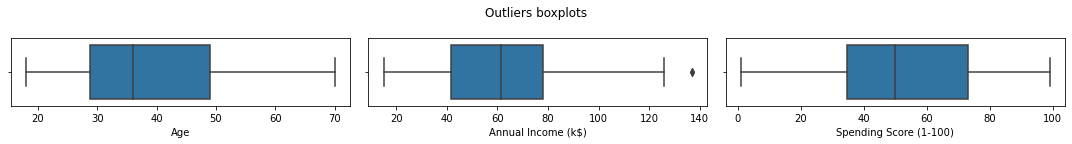

In [8]:
# Check for outliers
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axs = plt.subplots(1, 3, figsize = (15,2))
for j in range(len(features)):
    sns.boxplot(df[features[j]], ax = axs[j])
fig.suptitle('Outliers boxplots')
plt.tight_layout()
plt.show()

There is no significant outliers. No cleaning tasks are needed.

## 3. Data viz

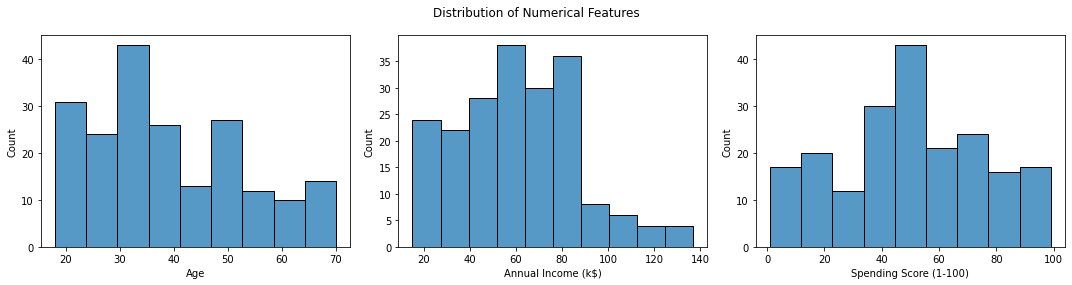

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.histplot(df[cols[i]], ax=axs[i])
fig.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

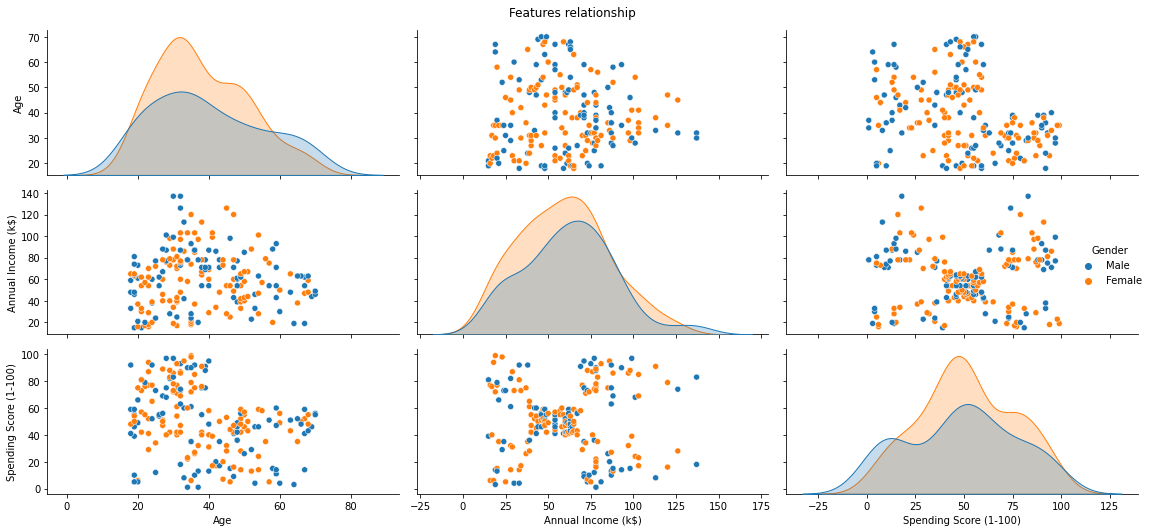

In [10]:
# Features relationship
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=2)
plt.suptitle('Features relationship')
plt.tight_layout()
plt.show()

## 4. Data preparation

In [11]:
# First, I will eliminate 'Customer ID' feature as it's unnecessary
df.drop('CustomerID', axis=1, inplace=True)

In [12]:
# Second, I will encode 'Gender' values to make them appropiate for analysis
df_enc = df.replace({'Gender': {'Female':0, 'Male':1}})

In [13]:
df_enc.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [14]:
# As features have different scales, I have to convert them to a same scale via MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df_enc)

In [15]:
X[:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

## 5. Model creation

### 5.1 KMeans

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

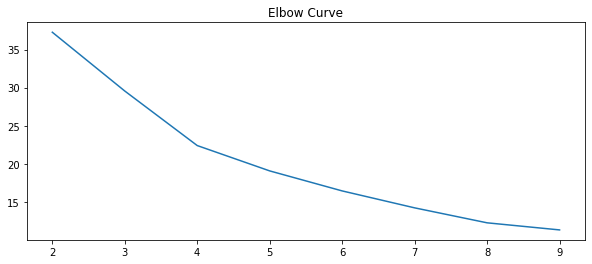

In [17]:
# Elbow Method to identify optimum no. of clusters
inertia = []
range_of_clusters = list(range(2, 10))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range_of_clusters, inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

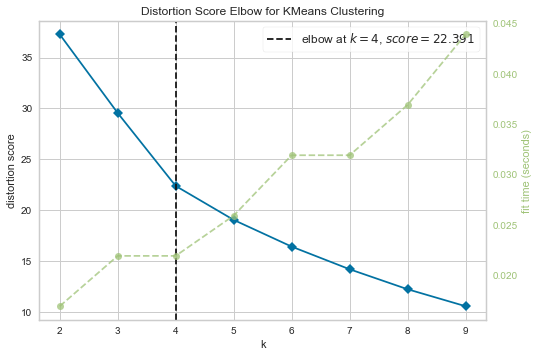

C:\Users\cim_3\anaconda3\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [18]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=4), X, k=(2,10))

In [19]:
# K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Labeling the data
df_kmeans = df.copy()
df_kmeans['Cluster'] = kmeans.labels_
df_kmeans.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,0


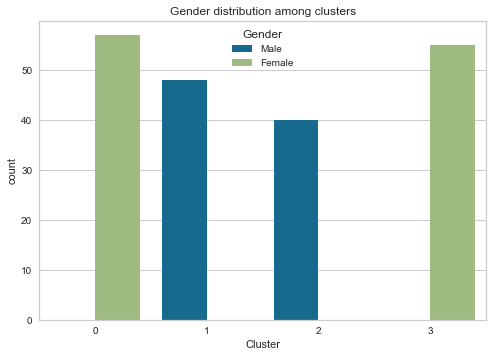

In [20]:
## Age distributions among clusters
sns.countplot(data = df_kmeans, x = 'Cluster', hue = 'Gender')
plt.title('Gender distribution among clusters')
plt.show()

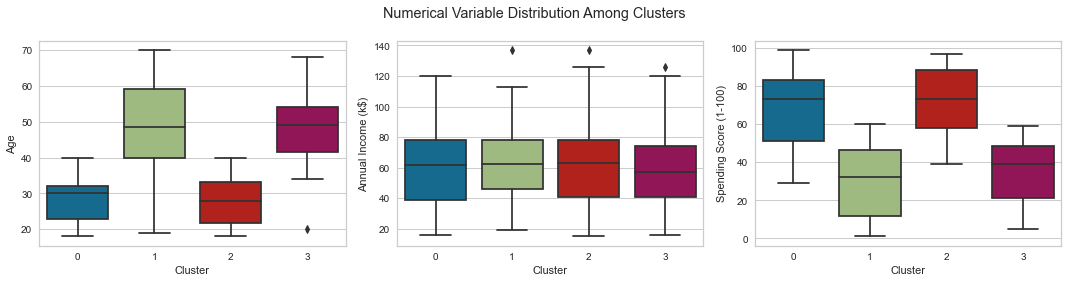

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data=df_kmeans, x='Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

Cluster Insights:
All the clusters have almost identical annual income distributions. So, let us analyze customer clusters based on gender, age, and spending score.

Cluster 0: Low age females with high spending score

Cluster 1: High age males with low spending score

Cluster 2: Low age males with high spending score

Cluster 3: High age females with low spending score

### 5.2 Hierarchical Clustering

There are 2 hierarchical clustering techniques: Divisive and Agglomerative. I will perform an agglomerative clustering.

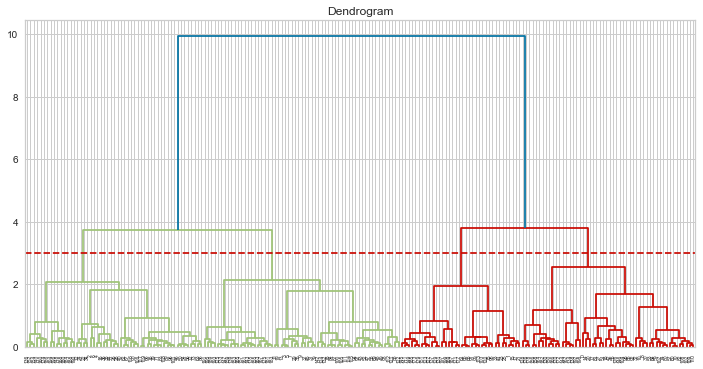

In [23]:
# Optimal number of clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 6))
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Dendrogram')

dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.show()

In [24]:
# Agglomerative clustering with 4 clusters
agg_clust = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
agg_clust.fit(X)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [25]:
# Labeling the data
df_aggclust = df.copy()
df_aggclust['Cluster'] = agg_clust.labels_
df_aggclust.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,0
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3


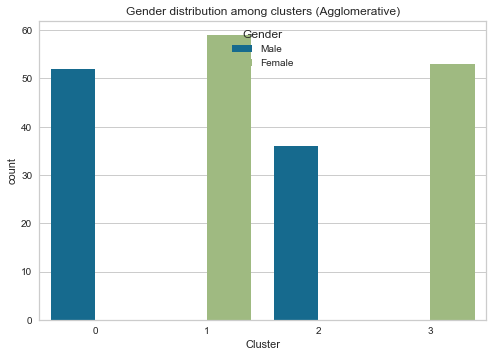

In [28]:
## Age distributions among clusters
sns.countplot(data = df_aggclust, x = 'Cluster', hue = 'Gender')
plt.title('Gender distribution among clusters (Agglomerative)')
plt.show()

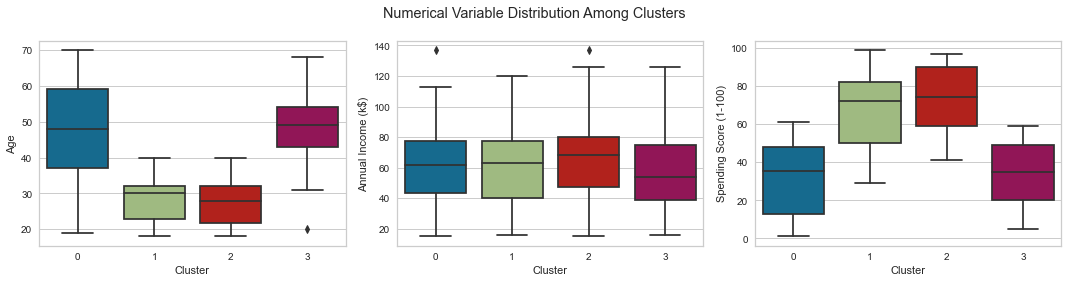

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data=df_aggclust, x='Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

Cluster Insights:
All the clusters have almost identical annual income distributions. So, let us analyze customer clusters based on gender, age, and spending score.

Cluster 0: High age males with low spending score

Cluster 1: Low age females with high spending score

Cluster 2: Low age males with high spending score

Cluster 3: High age females with low spending score